# Project 05 (Scale-Free Networks)
- Jan Bauer (18-764-571)
- Adrian Iten (15-722-291)

In [1]:
!pip install powerlaw

In [1]:
#Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
from matplotlib.pyplot import figure
from scipy.special import factorial
from scipy.stats import poisson, expon, norm

In [2]:
#This package is necessary to be able to print all the output generated in a cell, not just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
plt.rcParams["figure.figsize"] = (10,5)

## A05.1 Scale-free Networks

In [ ]:
def average(lst):
    return sum(lst)/len(lst)

In [ ]:
#Compute average degree <k> of the graph
def compute_average_degree(graph):
    graph_degrees = graph.degree()
    graph_degrees = [graph_degrees[i] for i in graph.nodes()]
    n_edges = sum(graph_degrees)
    n_nodes = len(graph.nodes())
    average_degree = n_edges / n_nodes
    return average_degree

In [ ]:
def plot_distributions(degrees, average_degree):
    unique_degrees = np.sort(np.unique(degrees))
    #print(unique_degrees)
    figure(figsize=(10, 6), dpi=200)
    avg_degree = average(degrees)
    plot_degree_distribution(degrees)
    plot_poisson_distribution(unique_degrees, average_degree)
    plot_powerlaw_distribution(degrees, average_degree)
    plot_exponential_distribution(unique_degrees, average_degree)

    
    plt.title("Node Degree k vs.\n Node Degree Distribution P(k)")
    plt.xscale('log')
    plt.xlabel("k")
    
    #plt.ylim([0, 1])
    plt.yscale('linear')
    plt.ylabel("P(k)")
    
    plt.legend()
    plt.show()

In [ ]:
def plot_degree_distribution(degrees):
    bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees)+1), 11)
    plt.hist(degrees, bins, label='Node Degree Distribution PDF', density=True, alpha=0.5, color='b')

In [ ]:
def plot_poisson_distribution(degrees, average_degree):
    y = poisson.pmf(degrees, average_degree)
    plt.plot(degrees, y, color='g', marker='+', label='Fitted Poisson PDF', linewidth=1)
    #plt.plot(degrees, y, color='g', marker='+', label='Fitted Poisson PDF', linewidth=1)
    #exponential distribution
    #y_exp = expon.pdf(deg, loc=0, scale=avg_degree)
    #_ = plt.plot(deg,y_exp,color='r',label='exponential')

In [ ]:
def plot_powerlaw_distribution(degrees, average_degree):
    powerlaw.plot_pdf(degrees, label='Fitted Powerlaw PDF', color='r', marker='o', linewidth=1)
    #powerlaw.plot_pdf(degrees, label='Powerlaw Approximation', color='r', marker='o', linewidth=1)

In [ ]:
def plot_exponential_distribution(unique_degrees, average_degree):
    y = expon.pdf(unique_degrees, loc=0, scale=average_degree)
    plt.plot(unique_degrees, y, color='yellow', marker='x', label='Fitted Exponential PDF')

In [ ]:
def load_graph(graph_name):
    return nx.read_gml('Data/graph_'+graph_name+'.gml',destringizer = int)

In [ ]:
def analyze_graph(graph_name):
    print('--- {}-Graph ---'.format(graph_name.title()))
    graph = load_graph(graph_name)
    graph_degrees = graph.degree()
    degrees = [graph_degrees[i] for i in graph.nodes()]
    
    avg_degree = compute_average_degree(graph)
    print("Min Node Degree: {}".format(min(degrees)))
    print("Max Node Degree: {}".format(max(degrees)))
    print("Average Node Degree: <k> ≈ {}".format(round(avg_degree, 2)))
    deg = np.asarray([d for d in dict(graph.degree()).values()])
    
    results = powerlaw.Fit(deg, verbose=False) #
    gamma = results.power_law.alpha # Although the powerlaw package calls the exponent alpha we called it gamma in our formula
    print("Fitted power law-exponent: Ɣ ≈ {}".format(round(gamma, 2)))
    sigma = results.power_law.sigma
    print('Standard error of fit: σ ≈ {}'.format(round(sigma, 4)))
     
    #Plot the degree distribution (histogram & log-log scale) 
    average_degree = compute_average_degree(graph)
    plot_distributions(degrees, average_degree)
    return graph

### A05.1.1 & 1.2
Compute the power-law exponent $\gamma$ of the degree distribution $P(k)$~$k^{-\gamma}$ and the corresponding error

--- Escort-Graph ---
Min Node Degree: 1
Max Node Degree: 305
Average Node Degree: <k> ≈ 4.67
Fitted power law-exponent: Ɣ ≈ 2.95
Standard error of fit: σ ≈ 0.0792


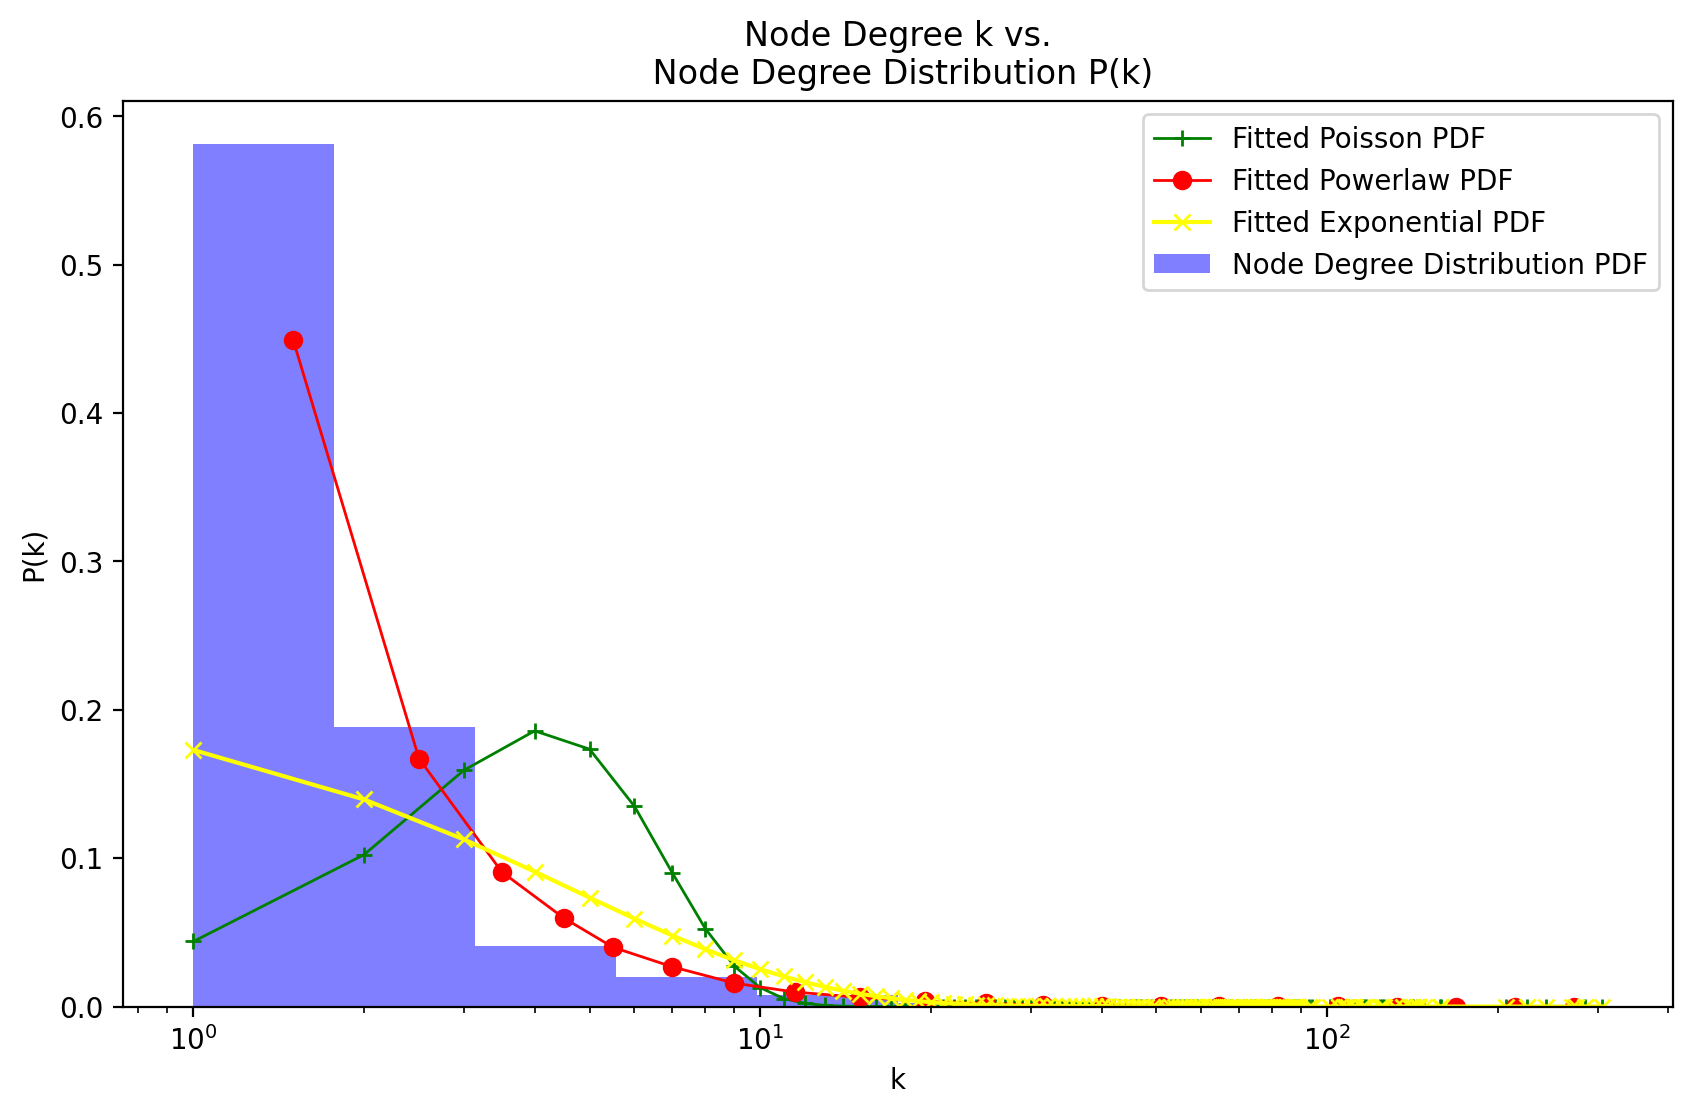

In [ ]:
escort_graph = analyze_graph('escort')  

--- Amazon-Graph ---
Mounted at /content/drive
Min Node Degree: 1
Max Node Degree: 549
Average Node Degree: <k> ≈ 5.53
Fitted power law-exponent: Ɣ ≈ 4.07
Standard error of fit: σ ≈ 0.097


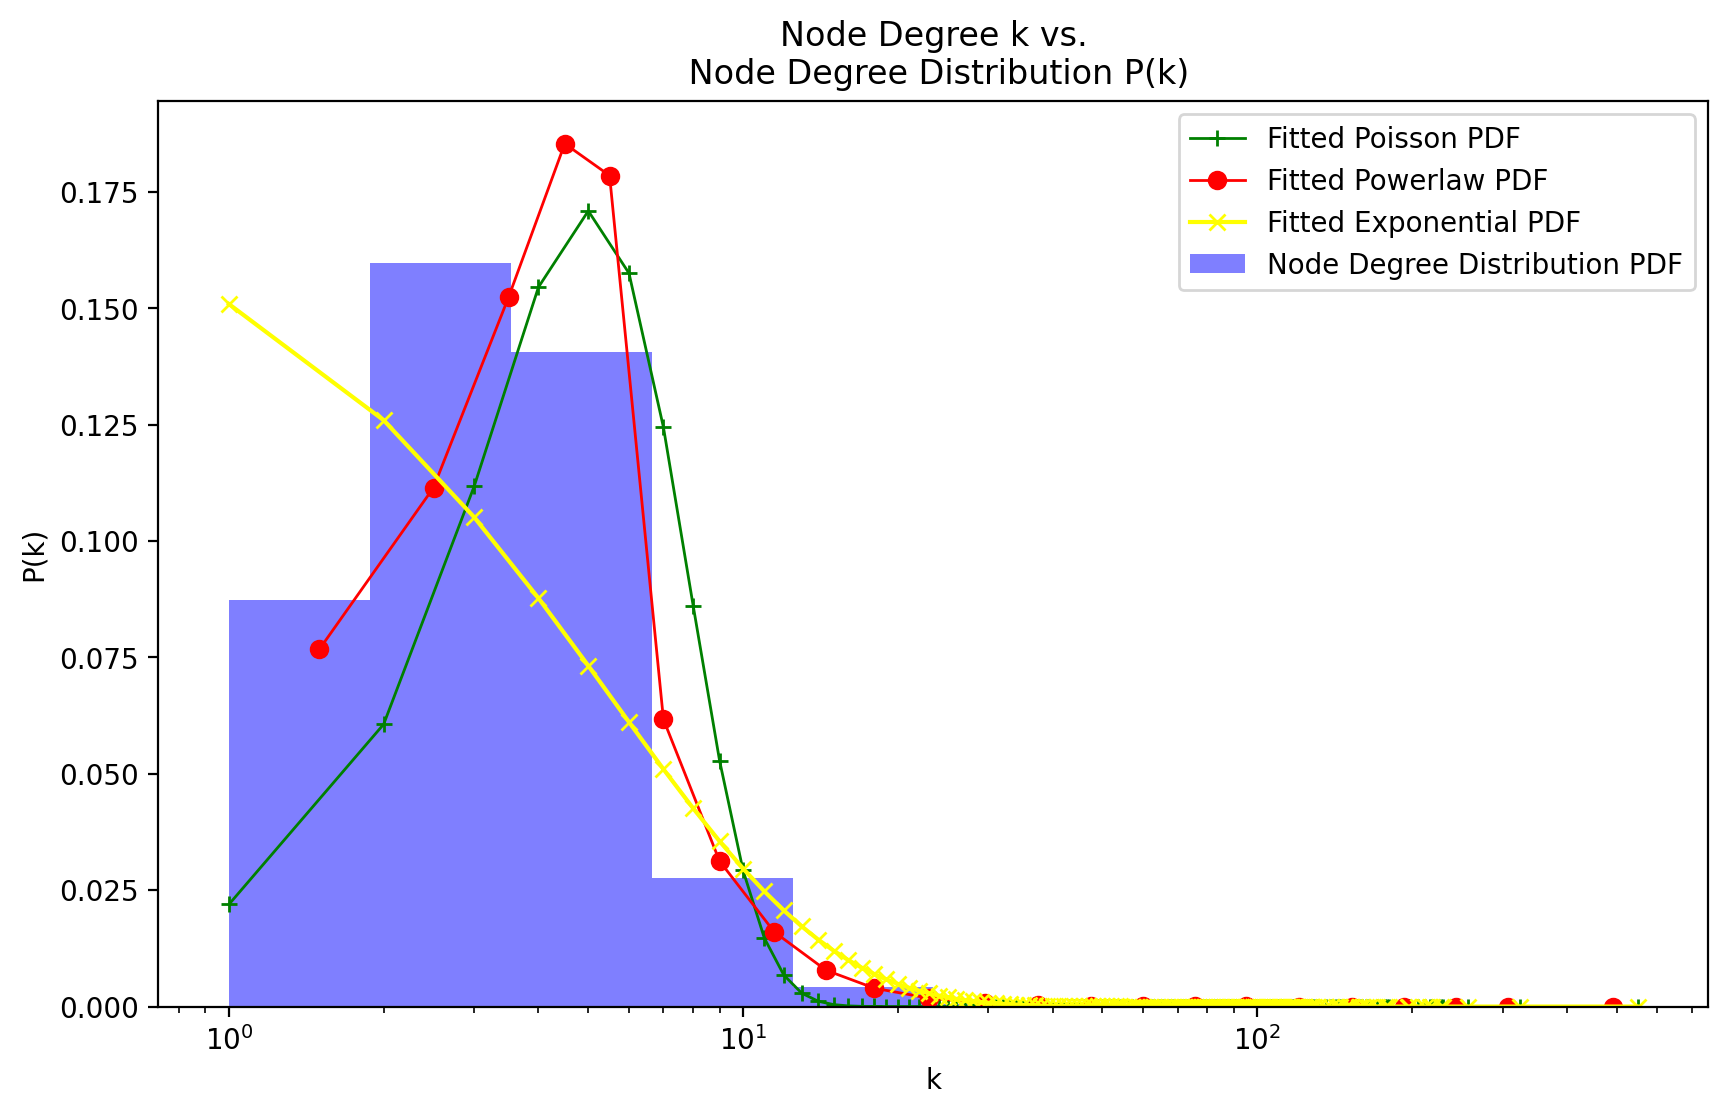

In [ ]:
amazon_graph = analyze_graph('amazon')  

--- Actors-Graph ---
Min Node Degree: 1
Max Node Degree: 3956
Average Node Degree: <k> ≈ 80.18
Fitted power law-exponent: Ɣ ≈ 2.16
Standard error of fit: σ ≈ 0.0033


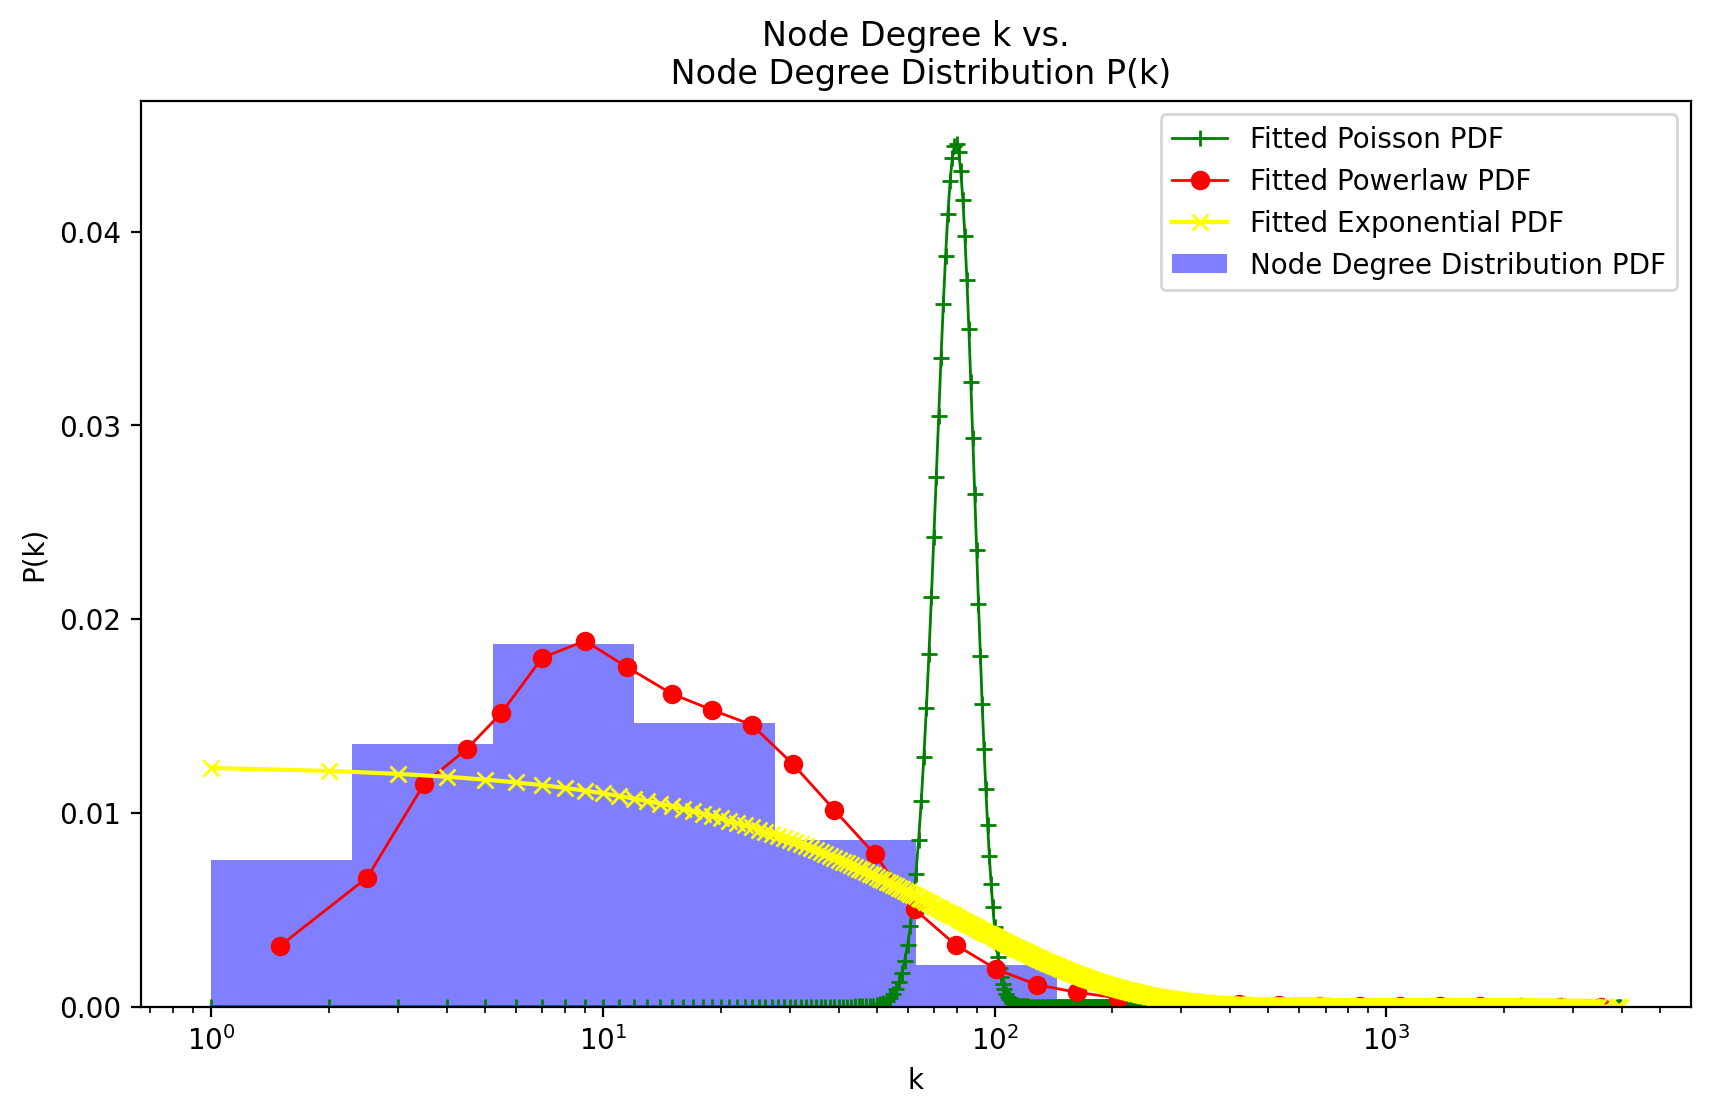

In [ ]:
actors_graph = analyze_graph('actors')

--- Internet-Graph ---
Mounted at /content/drive
Min Node Degree: 1
Max Node Degree: 2760
Average Node Degree: <k> ≈ 6.2
Fitted power law-exponent: Ɣ ≈ 2.11
Standard error of fit: σ ≈ 0.0367


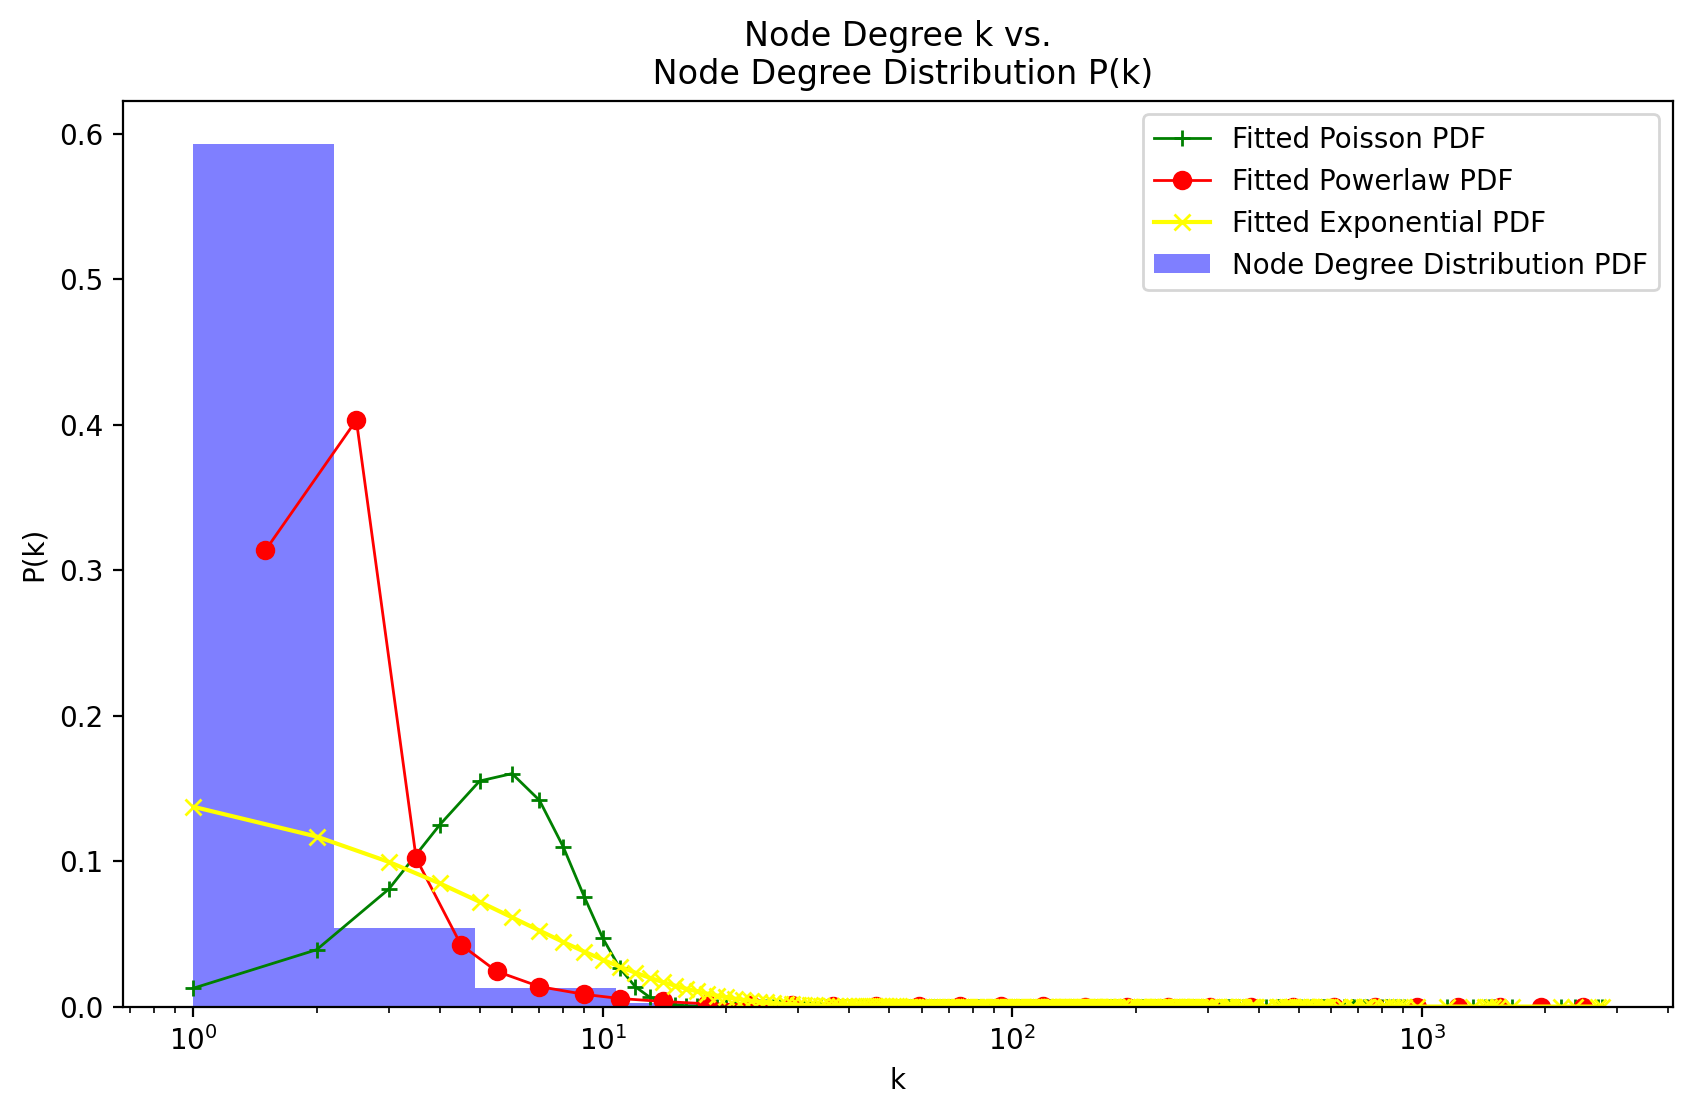

In [ ]:
internet_graph = analyze_graph('internet')  

### A05.1.3
What does it mean in practice for the Internet?  
$\implies$ Since the internet graph follows a powerlaw distribution with an exponent of Ɣ ≈ 2.11
we can conclude that the Internet is a scale free network. 
This is in line with the slides about scale-free networks that suggest that the internet is (approximately) scale-free.
The given powerlaw distribution implies that the low-degree nodes belong to very dense sub-graphs  
and those sub-graphs are connected to each other through hubs.  
**$\implies$ In practice, this means that there exist such hubs like internet service providers (e. g. Cablecom),  
whilst the low-level nodes (end users' devices) have no direct physical connection to each other. Instead, they communicate with each other over hubs.**

## A05.2 Preferential Attachment model
Compute the average clustering coefficient, assortativity, average shortest path length and diameter.

In [13]:
N = [50,100,500,1000,5000]
ac_list = []
as_list = []
asp_list = []
di_list = []

ac_rnd_list = []
as_rnd_list = []
asp_rnd_list = []
di_rnd_list = []

n_iter = 10

for n in N:
    ac_iter_list = []
    as_iter_list = []
    asp_iter_list = []
    di_iter_list = []

    ac_iter_rnd_list = []
    as_iter_rnd_list = []
    asp_iter_rnd_list = []
    di_iter_rnd_list = []

    for it in range(n_iter):
      # Generate preferential atttachmend graph
      # Compute metrics for the generated graph
      g = nx.barabasi_albert_graph(n,3,seed=it)
      ac_iter_list.append(nx.average_clustering(g))
      as_iter_list.append(nx.degree_assortativity_coefficient(g))
      asp_iter_list.append(nx.average_shortest_path_length(g))
      di_iter_list.append(nx.diameter(g))
      
      #Compute the same metrics for the randomized graph
      g_rnd = nx.algorithms.smallworld.random_reference(g, niter=10, connectivity=False, seed=123)
      ac_iter_rnd_list.append(nx.average_clustering(g_rnd))
      as_iter_rnd_list.append(nx.degree_assortativity_coefficient(g_rnd))
      asp_iter_rnd_list.append(nx.average_shortest_path_length(g_rnd))
      di_iter_rnd_list.append(nx.diameter(g_rnd))
    ac_list.append(sum(ac_iter_list) / len(ac_iter_list))
    as_list.append(sum(as_iter_list) / len(as_iter_list))
    asp_list.append(sum(asp_iter_list) / len(asp_iter_list))
    di_list.append(sum(di_iter_list) / len(di_iter_list))
    ac_rnd_list.append(sum(ac_iter_rnd_list) / len(ac_iter_rnd_list))
    as_rnd_list.append(sum(as_iter_rnd_list) / len(as_iter_rnd_list))
    asp_rnd_list.append(sum(asp_iter_rnd_list) / len(asp_iter_rnd_list))
    di_rnd_list.append(sum(di_iter_rnd_list) / len(di_iter_rnd_list))

In [8]:
def comparison_plot(x, y1, y2, ylabel):
    plt.plot(x, y1, color='r', marker='o', label='G')
    plt.plot(x, y2, color='b', marker='x', label='G_RND')
    plt.xscale('log')
    plt.yscale('linear')
    plt.xlabel('N')
    plt.ylabel(ylabel)
    plt.title("{} for G and G_RND as a function of N".format(ylabel))
    plt.legend(loc="lower right")
    plt.show()

**Disclaimer: When running the experiment only for one iteration we received non reproducable results.  
Therefore, we decided to run the experiment multiple (n_iter) times and average the results in order to increase the stability of our results.**

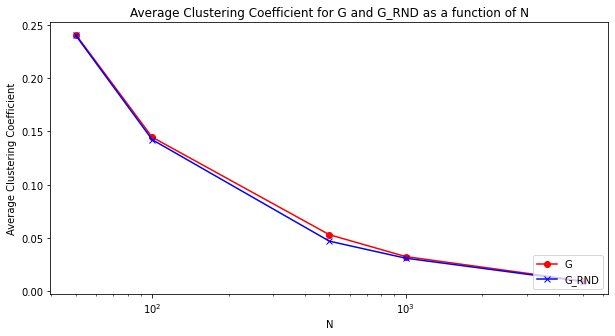

In [14]:
comparison_plot(N, ac_list, ac_rnd_list, 'Average Clustering Coefficient')

The average clustering coefficient remains unchanged on average by randomization.  
The is because the average likelihood of triangles existing in the neighbourhood of a node is not influenced by the randomization.  


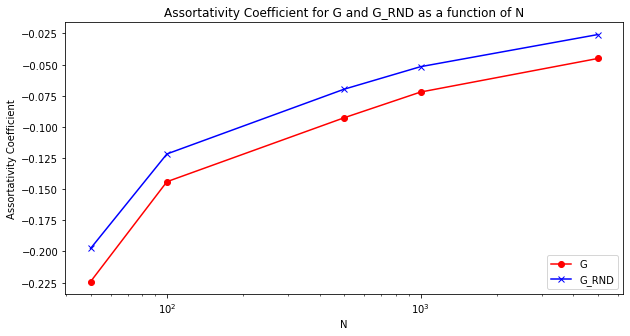

In [15]:
comparison_plot(N, as_list, as_rnd_list, 'Assortativity Coefficient')

On average the degree asortativity coefficient slightly increases by randomization.  
The assortativity coefficient is calculated as the Pearson correlation coefficient of degree between pairs of linked nodes.  
And since the Barabasi-Albert model's degree distribution follows a power-law distribution, it has not a high assortativity.  
Therefore by randomizing the graph it is likely to make the graph more homogenously connected and hereby increasing the assortativity coefficient.  

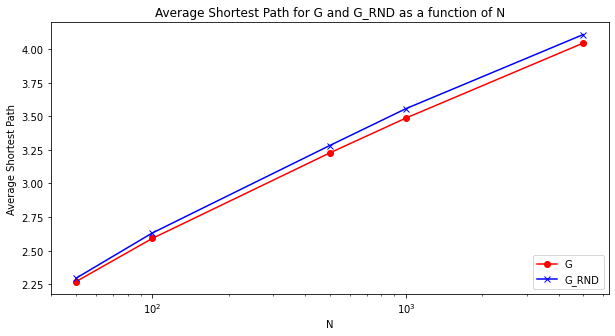

In [16]:
comparison_plot(N, asp_list, asp_rnd_list, 'Average Shortest Path')

The average shortest path does not tend to be changed significantly by randomization,  
because if you swap an edge e = (u, v) at another place this might increase the shortest paths  
d(u, w) and d(v, w) but decrease them elsewhere. Since we only consider the **average** shortest paths  
the increased path length in one case will then be compensated by a decreased shortest path length  
in another case.

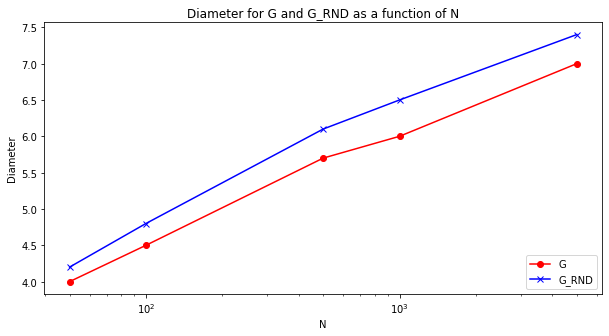

In [17]:
comparison_plot(N, di_list, di_rnd_list, 'Diameter')

On average the diameter of the graph increases slightly by randomization.
This might be due to the fact that barabasi albert graph tend to still form a circle  
even when the number of nodes added is increasing, since a new node gets connected to n other nodes  
with equal probability. However if we randomize this graph we randomly remove edges and  
place them at a place where there is no edge yet. This causes circular spatial representation of the graph to get squashed a bit into a more oval shape.

**Conclusion:**  
The influence of randomization on the average clustering coefficient and average shortest path metric is not statistically significant.  
This is because a Barabasi-Albert model's degree distribution follows a power-law distribution in both cases.  
On average the assortativity coefficient and the diameter increased through randomization.  